# Лабораторная работа № 4
## Мусаев Артур
## А-13а-20
### Вариант № 16

## 4.1

На данных для конкретного варианта построить наилучший многочлен  по МНК. \
Найти численность  населения Канады  в 2019 году  и сравнить полученное значение  с актуальным значением  (взять из интернета). \
Решить ту же  задачу на основе интерполяционного многочлена

Импортируем библиотеки:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as lg

x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], dtype = 'float')
y = np.array([15, 18, 21, 24.6, 28.5, 31, 34, 38])


Функция, возвращающая коэффициенты (решается система):

In [2]:
def fitting_a_MNK(x, y, m):
    A = np.eye(len(x))
    b = np.zeros(len(x))
    a = np.zeros(m)
    for k in range(m):
        for j in range(m):
            A[k][j] = np.sum([i**(k+j) for i in x])
        b[k] = np.sum([y[i]*(x[i])**k for i in range(len(x))])
    for i in range(m):    
        a[i] = lg.solve(A, b)[i]
    return a

Многочлен МНК:

In [3]:
def P(x, a, m=8):
    return np.dot(np.array([x**i for i in range(m)]), a)

Среднеквадратичное отклонение для МНК:

In [4]:
def SKO_MNK(x, y, m):
    return np.sqrt(1/m*np.sum([(P(x[i], fitting_a_MNK(x,y,m), m) - y[i])**2 for i in range(m)]))

Найдём лучшую степень для МНК:

In [5]:
G = np.zeros(5)
for i in range(1,6):
    G[i-1] = SKO_MNK(x, y, i)
print(G)
print(np.argmin(G))

[11.2625      0.14712138  0.20940512  0.16868507  0.32618083]
1


C:\Users\armus\AppData\Local\Temp\ipykernel_22784\1421857217.py:10: LinAlgWarning: Ill-conditioned matrix (rcond=8.69368e-22): result may not be accurate.
  a[i] = lg.solve(A, b)[i]
C:\Users\armus\AppData\Local\Temp\ipykernel_22784\1421857217.py:10: LinAlgWarning: Ill-conditioned matrix (rcond=1.97852e-32): result may not be accurate.
  a[i] = lg.solve(A, b)[i]
C:\Users\armus\AppData\Local\Temp\ipykernel_22784\1421857217.py:10: LinAlgWarning: Ill-conditioned matrix (rcond=2.0276e-41): result may not be accurate.
  a[i] = lg.solve(A, b)[i]


Ищем многочлен первой степени. Ошибки возникают из-за плохообусловленной матрицы, при решении уравнения.

Население Канады в 2019 году: 37,59 млн человек

In [6]:
m = 2
a1 = fitting_a_MNK(x,y,m)
print(P(2019, a1, m))
print(SKO_MNK(x,y, m))

37.389404761902824
0.14712137691794522


Как видно по методу МНК существует небольшая погрешность.

Находим коэффициенты в интерполяционном многочлене:

In [7]:
def fitting_a_inter(x, y):
    A = np.eye(len(x))
    for i in range(len(x)):
        for j in range(len(x)):
            A[i][j] = (x[i])**j
    return lg.solve(A, y)

In [8]:
print(fitting_a_inter(x, y))

[ 4.19551200e+13 -1.48074387e+11  2.23968174e+08 -1.88195111e+05
  9.48789286e+01 -2.86992536e-02  4.82266463e-06 -3.47308061e-10]


C:\Users\armus\AppData\Local\Temp\ipykernel_22784\2765827243.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07231e-38): result may not be accurate.
  return lg.solve(A, y)


Среднеквадратичное отклонение при интерполяции:

In [9]:
def SKO_INTER(x, y, m=8):
    return np.sqrt(1/m*np.sum([(P(x[i], fitting_a_inter(x,y), m) - y[i])**2 for i in range(m)]))

In [10]:
print(SKO_INTER(x,y))
a2 = fitting_a_inter(x, y)
print(P(2019, a2))

0.12278431809287096
37.9375


C:\Users\armus\AppData\Local\Temp\ipykernel_22784\2765827243.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07231e-38): result may not be accurate.
  return lg.solve(A, y)


Значение отклонения В интерполяционном методе получилось меньше чем при МНК. Так же стоит сказать, что \
из-за плохой обусловленности, значения функции по заданным точкам получалось не совсем точное.

Посмотрим на графики:

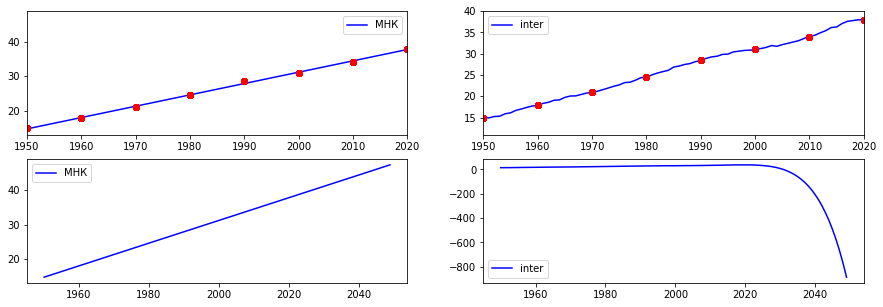

In [11]:
fig, ax = plt.subplots(2,2, figsize = (15,5))
x_ = np.arange(1950, 2050, dtype = 'float')
ax[0][0].plot(x_, [P(i, a1, 2) for i in x_], color = 'blue', label = 'МНК')
ax[0][0].set_xlim(1950, 2020)
ax[0][1].plot(x_, [P(i, a2) for i in x_], color = 'blue', label = 'inter')
ax[0][1].set_xlim(1950, 2020)
ax[0][1].set_ylim(11, 40)
ax[1][0].plot(x_, [P(i, a1, 2) for i in x_], color = 'blue', label = 'МНК')
ax[1][1].plot(x_, [P(i, a2) for i in x_], color = 'blue', label = 'inter')
for i in range(len (x)):
    ax[0][0].plot(x,y,'ro')
    ax[0][1].plot(x,y,'ro')
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

Как видно из графиков, хоть и отклонение при интерполяции получается меньше, но выходя за табличные данные \
интерполяционный многочлен принимает вовсе отрицательные значения. Тут два варианта, либо Канада исчезнет, либо \
МНК точнее ведёт себя при значениях, лежащих за границами данного отрезка.

## 4.2

Дана функция $ f(x) = 6sin(6x) $. Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. \
Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке [-2.5;-1.5] не превышала заданной величины  Построить графики многочленов и графики погрешностей. 
Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте. Сравнить полученные результаты. 

Напишем заданную функцию:

In [12]:
x0 = -2.5
xn = -1.5
eps = 0.005
def F(x):
    return 6*np.sin(6*x)


Функция, строющая многочлен Лагранжа и возвращающая значение в заданной точке:

In [13]:
def lagranj(x,y,t):
    z=0.0
    for j in range(len(y)):
        p1=1.0
        p2=1.0
        for i in range(len(x)):
            if i != j:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z = z + y[j]*p1/p2
    return z

Как вообще выглядит наш сплайн:


\$  
S_3(x) = 
     \begin{cases}
       s_0 = a_0 + b_0x+c_0x^2+d_0x^3, \ x \in [x_0, x_1] \\
       s_1 = a_1 + b_1x+c_1x^2+d_1x^3, \ x \in [x_1, x_2] \\
       \text{....................................................}\\
       s_n = a_n + b_nx+c_nx^2+d_nx^3, \ x \in [x_{n-1}, x_n] \\
     \end{cases}
\$


При этом дополнительные условия: $ {s_1}^{'}(x_1) = {s_2}^{'}(x_1), \ {s_2}^{'}(x_2) = {s_3}^{'}(x_2) \ $ и т.д., \
$ {s_1}^{''}(x_1) = {s_2}^{''}(x_1), \ {s_2}^{''}(x_2) = {s_3}^{''}(x_2) \ $ и дополнительные условия: \
$ {s_1}^{''}(x_0) =  {s_n}^{''}(x_n) = 0 $

Функция, ищущая коэффициенты уравнений a, b, c, d кубического сплайна, и возвращающая матрицу с ними:

In [14]:
def cubic_inter(x1,y1):
    x = np.copy(x1)
    y = np.copy(y1)
    
    n = len(x)
    hi = x[1]-x[0] #шаг постоянен

    A = np.eye(n)
    b = np.zeros(n)
    A[0][0] = hi
    A[-1][-1] = hi
    
    for i in range(1,n-1):
        A[i][i-1] = hi                   #Матрица А - трёхдиагональня
        A[i][i+1] = hi
        A[i][i] = 2.0*(hi+hi)
        b[i] = 3.0*((y[i+1]-y[i])/hi - (y[i]-y[i-1])/hi)
        
    c = lg.solve(A,b) #решая матрицу находим коэфф. c
    
    d = np.zeros(n-1) #находим d и b, зная c 
    b = np.zeros(n-1)
    a = np.zeros(n-1)
    for i in range(len(d)):
        d[i] = (c[i+1] - c[i]) / (3*hi)
        b[i] = ((y[i+1]-y[i])/hi) - (hi/3)*(2*c[i] + c[i+1]) 
        a[i] = y[i]
    
    params = np.zeros((len(a), 4))
    for i in range(len(a)):
        params[i][0] = a[i]
        params[i][1] = b[i]
        params[i][2] = c[i]
        params[i][3] = d[i]
    
    return params

Функция, считающая значение сплайна в данной точке:

In [15]:
def calc(x_0, x, y, mtr):
    A = np.copy(mtr)
    n = len(x)
    if x_0 <= x[0]: 
        s = A[0]
        dx = x_0-x[0]
    elif x_0 >= x[n-1]:
        s = A[-1]
        dx= x_0-x[n-2]
    else:
        i = 0
        j = n - 1
        while i + 1 < j:
            k = i + (j - i) // 2
            if x_0 <= x[k]:
                j = k
            else:
                i = k
        s = A[j-1]
        dx = x_0-x[j-1]
        #Вычисляем значение сплайна в заданной точке по схеме 
    return s[0] + s[1]*dx + s[2]*dx**2 + s[3]*dx**3

Возьмём начальное количество точек равное 5(4 отрезка). Построим графики погрешностей:

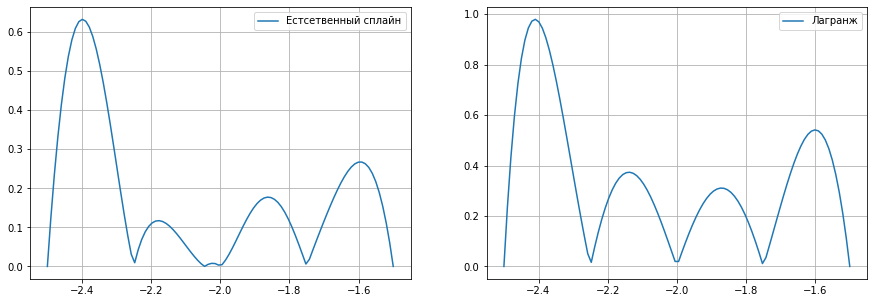

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

spline_n = 5
lagranj_n = 5

x = np.linspace(x0, xn, spline_n)
y = np.array([F(i) for i in x])
mtr = cubic_inter(x,y)

x_plt = np.linspace(x0, xn, 100)
y_plt = np.array([F(i) for i in x_plt])


ax[0].plot(x_plt, [np.abs(calc(x_plt[i], x, y, mtr)-y_plt[i]) for i in range(len(x_plt))], label = 'Естсетвенный сплайн')
ax[1].plot(x_plt, [np.abs(lagranj(x, y, x_plt[i])-y_plt[i]) for i in range(len(x_plt))], label = 'Лагранж')
for i in range(2):
    ax[i].grid()
    ax[i].legend()




Ищем лучшее разбиение для Лагранжа:

In [17]:
x_lagranj = np.linspace(x0, xn, lagranj_n)
y_lagranj = np.array([F(i) for i in x])


while (np.amax(np.abs(y_plt - lagranj(x_lagranj,y_lagranj, x_plt)))) > eps:
    lagranj_n += 1
    x_lagranj = np.linspace(x0, xn, lagranj_n)
    y_lagranj = np.array([F(i) for i in x_lagranj])
       

И ищем лучшее разбиение для сплайна:

In [18]:
x_spline = np.linspace(x0, xn, spline_n)
y_spline = np.array([F(i) for i in x_spline])


mtr = cubic_inter(x_spline,y_spline)
temp = np.zeros(len(x_plt))

for i in range(len(temp)):
    temp[i] = calc(x_plt[i],x_spline,y_spline, mtr)
while (np.amax(np.abs(y_plt - temp))) > eps:
    spline_n += 1
    x_spline = np.linspace(x0, xn, spline_n)
    y_spline = np.array([F(i) for i in x_spline])
    mtr = cubic_inter(x_spline,y_spline)
    for i in range(len(temp)):
        temp[i] =calc(x_plt[i],x_spline,y_spline, mtr)


In [19]:
print(lagranj_n, spline_n)

9 39


Строим графики функции, естественного сплайна и функции Лагранжа, исходя из лучшего разбиения:

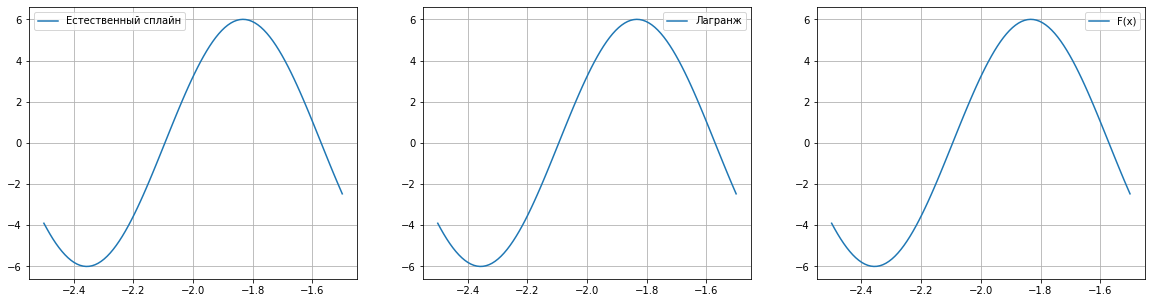

In [21]:
fig, ax = plt.subplots(1,3, figsize = (20,5))

x_plt = np.linspace(x0, xn, 100)

lagranj_n = (len(x_lagranj))
spline_n = (len(x_spline))

x_lagranj = np.linspace(x0, xn, lagranj_n)
y_lagranj = np.array([F(i) for i in x_lagranj])

x_spline = np.linspace(x0, xn, spline_n)
y_spline = np.array([F(i) for i in x_spline])
matr = cubic_inter(x_spline, y_spline)
ax[0].plot(x_plt, [calc(x_plt[i], x_spline, y_spline, mtr) for i in range(len(x_plt))], label = 'Естественный сплайн')
ax[1].plot(x_plt, [lagranj(x_lagranj, y_lagranj, x_plt[i]) for i in range(len(x_plt))], label = 'Лагранж')
ax[2].plot(x_plt, F(x_plt), label = 'F(x)')
for i in range(3):
    ax[i].grid()
    ax[i].legend()

## 4.3

$ f(x) = \frac {e^x-x-1}{x} $

Строим функцию, которая раскладывает в ряд тейлора и функцию, возвращающую коэффициент каждого элемента ряда

In [22]:
def F(x):
    return (np.exp(x)-x-1)/x

#Получение n-ого коэфициента
def Taylor_c(n):
    return 1 / np.math.factorial(n+2)

#Получение ряда тейлора
def Taylor(x,n):
    s = x*0.0
    for i in range(n):
        s = s + (Taylor_c(i) * (x**(i + 1)))
    return s


Находим нужное количество слагаемых и построим графики:

10


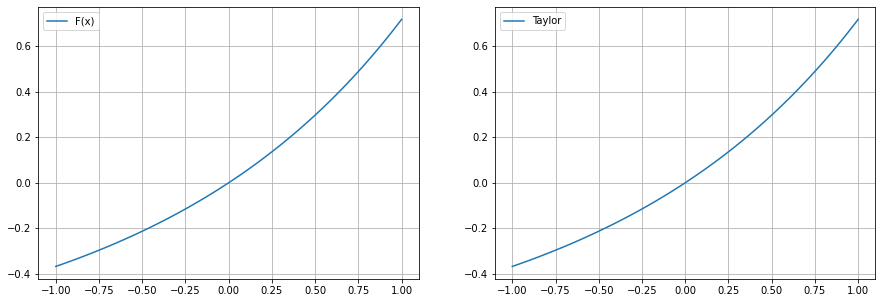

In [23]:
n = 1
a = -1
b = 1
eps = 1e-8
x = np.linspace(a , b ,100)
while np.amax(np.abs(Taylor(x,n) - F(x))) > eps:
    n += 1
print(n)

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(x, F(x), label='F(x)')
ax[1].plot(x,Taylor(x,n), label = 'Taylor')
for i in range(2):
    ax[i].legend()
    ax[i].grid()

Чебышевские многочлены:

In [24]:
def T(x,n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2*x*T(x,n-1) - T(x,n-2)

Формулы экономизации степенного ряда для 11-ой, 10-ой и 9-ой степени соответственно:

In [25]:
def ex_11(x):
     return (1/1024)*(2816*x**9 - 2816*x**7 + 1232*x**5 - 220*x**3 + 11*x + T(x,11))
def ex_10(x):
    return (1/512)*(1280*x**8 - 1120*x**6 + 400*x**4 - 50*x**2 + 1 + T(x,10))

def ex_09(x):
    return (1/256)*(576*x**7 - 432*x**5 + 120*x**3 - 9*x + T(x, 9))

Теперь минимизируем до той степени, при которой заданная погрешность сохраняется:

In [26]:
delta_11 = np.abs(F(x) - Taylor(x,10) - Taylor_c(10)*(ex_11(x)))
print(np.amax(delta_11) < eps)
delta_10 = np.abs(F(x) - Taylor(x,9) - Taylor_c(9)*(ex_10(x)))
print(np.amax(delta_10) < eps)
delta_09 = np.abs(F(x) - Taylor(x,8) - Taylor_c(8)*(ex_09(x)))
print(np.amax(delta_09) < eps)

True
True
False


При экономизации $ x^9 $ погрешность становится больше заданной

Построим графики:

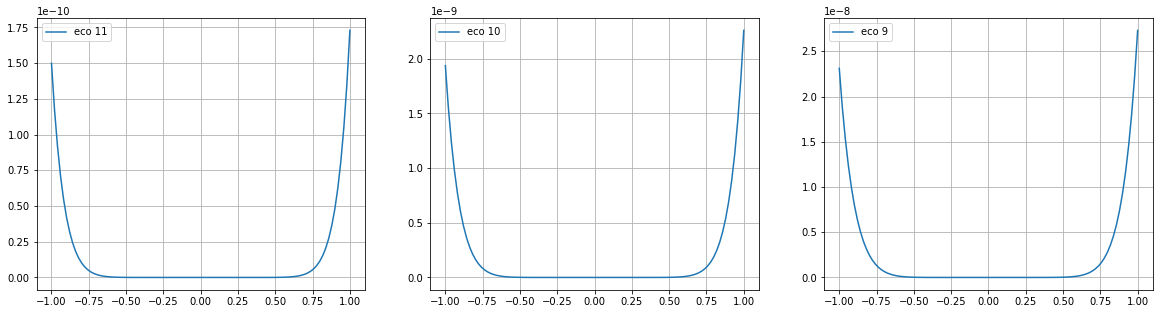

In [27]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].plot(x, delta_11, label = 'eco 11')
ax[1].plot(x, delta_10, label = 'eco 10')
ax[2].plot(x, delta_09, label = 'eco 9')
for i in range(3):
    ax[i].grid()
    ax[i].legend()

Как видно из графиков, погрешность распределяется особенным образом. По краям она начинает сильно расти, \
а в центре можно было минимизировать ещё.